In [1]:
# ANS 1:
# Mathematical formuls of SVM 
# 1. equation for the best fit line is = wTx + b
# 2. then we have the distance between two marginal planes is 
# wT(x1 - x2) / ||w|| = 2 / ||w||
# final cost function is 
# minimize: 1/2 * ||w||² + C * Σ(max(0, 1 - yᵢ(w ⋅ xᵢ + b)))
# C * Σ(max(0, 1 - yᵢ(w ⋅ xᵢ + b))) -- Hinge loss

In [2]:
# ANS 2 :
# The objective function of a linear Support Vector Machine (SVM) is typically formulated as a minimization problem, 
# aiming to find the optimal hyperplane that maximizes the margin while still correctly classifying the training data
# formula for objective function
# # minimize: 1/2 * ||w||² + C * Σ(max(0, 1 - yᵢ(w ⋅ xᵢ + b)))

In [3]:
# ANS 3:
# Kernel trick in SVM 
# when the data is inseperable 
# when we can't classify the data through best fit line and marginal planes then we use  kernerl trick.
# which transforms the data into a higher-dimensional space, where it may become linearly separable.

In [4]:
# ANS 4 
# support vectors
# these are the vectors which supports the best fit line in classification
# It is drawn from the nearest point of that specific category

# The support vectors are essential because they help in determining the margin of separation between the two classes. 
# The margin is defined as the perpendicular distance between the decision boundary and the nearest data points from each class. 
# The SVM aims to maximize this margin to achieve better generalization and robustness.

In [5]:
# ANS 5:
# 1.Hyperplane:
# In SVM, a hyperplane is a decision boundary that separates the data points of different classes. 
# In a two-dimensional feature space, a hyperplane is a straight line, and in a three-dimensional feature space, it is a plane.

# 2.Marginal Plane:
# The marginal plane in SVM refers to the parallel planes that are equidistant from the hyperplane and define the margin. 
# The margin is the region between the marginal planes where no data points exist. 
# In a two-dimensional feature space, the marginal planes are lines parallel to the hyperplane.

# 3.Hard Margin:
# In a hard margin SVM, the goal is to find a hyperplane that perfectly separates the data points of different classes 
# without allowing any misclassifications. 

# 4.Soft Margin:
# In a soft margin SVM, the algorithm allows for some misclassifications and overlapping points between the classes.

In [6]:
# ANS 6
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.datasets import load_iris

In [8]:
data = load_iris()

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df["target"]=data.target

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [16]:
x = df.iloc[:,:-1]
y = df["target"]

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

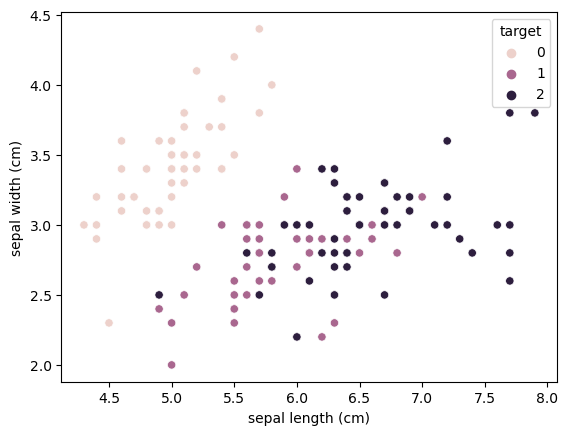

In [17]:
sns.scatterplot(x=x["sepal length (cm)"],y=x["sepal width (cm)"],hue=y)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=10)

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC(kernel='linear')

In [21]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
y_pred = svc.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
score = accuracy_score(y_pred,y_test)
score

1.0

In [25]:
# Hyper parameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameter = {
    'C' :[0.1 , 1 , 10 , 100 , 1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}

In [28]:
clf = GridSearchCV(svc , param_grid=parameter , refit=True , cv=5 , verbose=3)

In [29]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.870 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.870 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [30]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [31]:
y_pred1 = clf.predict(x_test)

In [32]:
accuracy_score(y_pred1,y_test)

1.0